# DATA SCIENCE PROJECT - AIRLINE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('Data_Train.xlsx')

In [2]:
data.head(6)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873


In [3]:
data.shape

(10683, 11)

In [4]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(10682, 11)

In [12]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [15]:
def change_to_date(column):
    data[column]=pd.to_datetime(data[column])

In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_to_date(i)

C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\271803378.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[column]=pd.to_datetime(data[column])
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\271803378.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column]=pd.to_datetime(data[column])
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\271803378.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[column]=pd.to_datetime(data[column])


In [18]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-03 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-03 05:50:00,2025-11-03 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-03 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882


In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
data['Journey_Date'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month

In [21]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-03 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-03 05:50:00,2025-11-03 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-03 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6


In [22]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Date                int32
Journey_Month               int32
dtype: object

In [23]:
data['Arr_Hr'] = data['Arrival_Time'].dt.hour
data['Arr_Min'] = data['Arrival_Time'].dt.minute      
data['Dep_Hr'] = data['Dep_Time'].dt.hour
data['Dep_Min'] = data['Dep_Time'].dt.minute      

In [24]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-03 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-03 05:50:00,2025-11-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-03 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25


In [25]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Date                int32
Journey_Month               int32
Arr_Hr                      int32
Arr_Min                     int32
Dep_Hr                      int32
Dep_Min                     int32
dtype: object

In [26]:
duration = list(data['Duration'])

In [28]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [29]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+ ' 0m'
        else:
            duration[i]='0h '+duration[i]

In [30]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [31]:
data['Duration']=duration

In [32]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-03 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-03 05:50:00,2025-11-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-03 09:25:00,2025-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-11-03 18:05:00,2025-11-03 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-11-03 16:50:00,2025-11-03 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [33]:
def hour(i):
    return i.split(' ')[0][0:-1]
def minute(i):
    return i.split(' ')[1][0:-1]

In [34]:
data['Duration_Hr']=data['Duration'].apply(hour)
data['Duration_Min']=data['Duration'].apply(minute)

In [35]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-03 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-03 05:50:00,2025-11-03 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-03 09:25:00,2025-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,4,25,9,25,19,0


In [36]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Date                int32
Journey_Month               int32
Arr_Hr                      int32
Arr_Min                     int32
Dep_Hr                      int32
Dep_Min                     int32
Duration_Hr                object
Duration_Min               object
dtype: object

In [37]:
data['Duration_Hr']=data['Duration_Hr'].astype(int)
data['Duration_Min']=data['Duration_Min'].astype(int)

In [38]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Date                int32
Journey_Month               int32
Arr_Hr                      int32
Arr_Min                     int32
Dep_Hr                      int32
Dep_Min                     int32
Duration_Hr                 int64
Duration_Min                int64
dtype: object

In [42]:
def drop_column(df,column):
    df.drop(column,axis=1,inplace=True)  

In [43]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time','Duration']:
    drop_column(data,i)

In [44]:
data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0


In [45]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [46]:
dict_a = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3, '4 stops':4}

In [47]:
data['Total_Stops']=data['Total_Stops'].map(dict_a)

In [48]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,21,35,16,50,4,45


In [49]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [50]:
len(data['Airline'].unique())

12

In [51]:
cat_data=[columns for columns in data.columns if data[columns].dtype=='O']

In [52]:
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']

In [53]:
con_data=[columns for columns in data.columns if data[columns].dtype!='O']

In [54]:
con_data

['Total_Stops',
 'Price',
 'Journey_Date',
 'Journey_Month',
 'Arr_Hr',
 'Arr_Min',
 'Dep_Hr',
 'Dep_Min',
 'Duration_Hr',
 'Duration_Min']

In [55]:
cat_data = data[cat_data]

In [56]:
cat_data.head(3)

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info


In [57]:
con_data = data[con_data]

In [58]:
con_data.head(3)

,Total_Stops,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,0,3897,24,3,1,10,22,20,2,50
1,2,7662,1,5,13,15,5,50,7,25
2,2,13882,9,6,4,25,9,25,19,0


In [59]:
cat_data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

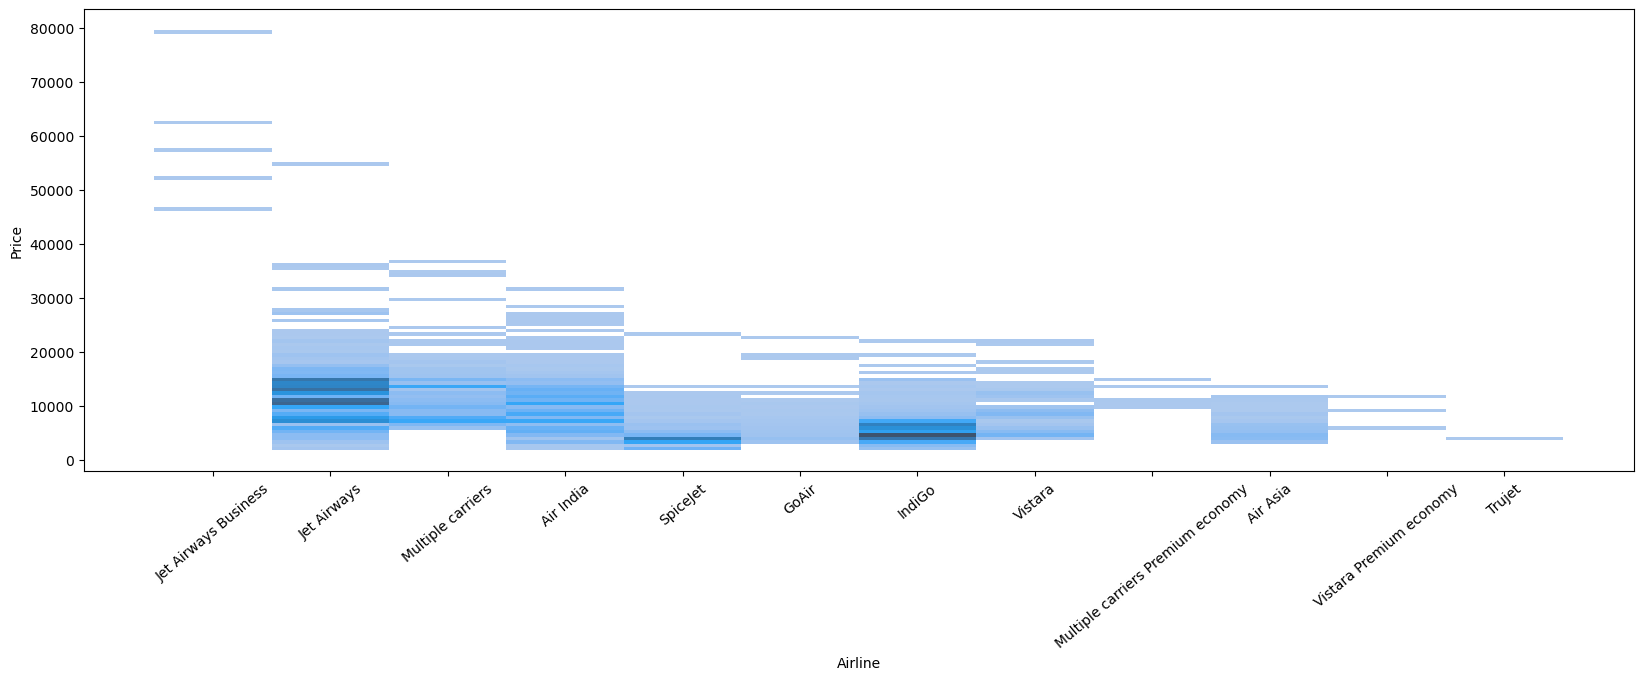

In [49]:
plt.figure(figsize=(20,6))
sns.histplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=40);

<Axes: xlabel='Total_Stops', ylabel='Price'>

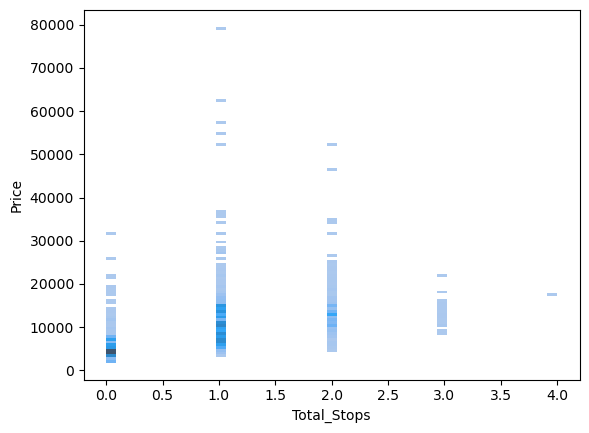

In [60]:
sns.histplot(x='Total_Stops',y='Price',data=data.sort_values('Price',ascending=False))

In [61]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [62]:
Airline = pd.get_dummies(cat_data['Airline'],drop_first=True,dtype=int)

In [63]:
Airline.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


In [64]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [65]:
Source = pd.get_dummies(cat_data['Source'],drop_first=True,dtype=int)

In [66]:
Source.head(3)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0


In [67]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [68]:
Destination = pd.get_dummies(cat_data['Destination'],drop_first=True,dtype=int)

In [69]:
Destination.head(3)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0


In [72]:
cat_data['Route_1'] = cat_data['Route'].str.split('→').str[0]

C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\1704658307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Route_1'] = cat_data['Route'].str.split('→').str[0]


In [73]:
cat_data.head(3)

,Airline,Source,Destination,Route,Additional_Info,Route_1
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL


In [74]:
cat_data['Route_2'] = cat_data['Route'].str.split('→').str[1]
cat_data['Route_3'] = cat_data['Route'].str.split('→').str[2]
cat_data['Route_4'] = cat_data['Route'].str.split('→').str[3]
cat_data['Route_5'] = cat_data['Route'].str.split('→').str[4]
cat_data['Route_6'] = cat_data['Route'].str.split('→').str[5]

C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\674001705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Route_2'] = cat_data['Route'].str.split('→').str[1]
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\674001705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Route_3'] = cat_data['Route'].str.split('→').str[2]
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\674001705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [75]:
cat_data

,Airline,Source,Destination,Route,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,BLR,DEL,NaN,NaN,NaN,NaN


In [76]:
cat_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
Route_6            10681
dtype: int64

In [77]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [78]:
for i in['Route','Additional_Info']:
    drop_column(cat_data,i)

C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\1077652302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column,axis=1,inplace=True)
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\1077652302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column,axis=1,inplace=True)


In [79]:
cat_data.head(3)

,Airline,Source,Destination,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL,LKO,BOM,COK,NaN,NaN


In [80]:
cat_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route_1            0
Route_2            0
Route_3         3491
Route_4         9116
Route_5        10636
Route_6        10681
dtype: int64

In [81]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Route_6'],
      dtype='object')

In [82]:
for i in ['Route_3', 'Route_4', 'Route_5', 'Route_6']:
    cat_data[i].fillna('None',inplace=True)

C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\44751615.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_data[i].fillna('None',inplace=True)
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\44751615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i].fillna('None',inplace=True)


In [83]:
cat_data.head(3)

,Airline,Source,Destination,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL,LKO,BOM,COK,None,None


In [84]:
drop_column(cat_data,'Route_6')

C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\1077652302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column,axis=1,inplace=True)


In [85]:
cat_data.head(3)

,Airline,Source,Destination,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL,LKO,BOM,COK,None


In [86]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [87]:
cat_data.columns

Index(['Airline', 'Source', 'Destination', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [88]:
for i in ['Route_1', 'Route_2', 'Route_3','Route_4', 'Route_5']:
    cat_data[i]=encoder.fit_transform(cat_data[i])

C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\1762382276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i]=encoder.fit_transform(cat_data[i])
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\1762382276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i]=encoder.fit_transform(cat_data[i])
C:\Users\balaj\AppData\Local\Temp\ipykernel_1496\1762382276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [89]:
cat_data.head()

,Airline,Source,Destination,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,0,34,8,13,5


In [90]:
cat_data['Route_3'].unique()

array([29,  1,  4,  3,  8,  6,  9,  0, 13, 21, 22,  7, 11, 23, 10,  2, 19,
       15, 17, 14, 27, 24, 20, 25, 12, 16,  5, 26, 28, 18])

In [91]:
new_data = pd.concat([cat_data,Source,Airline,Destination,con_data],axis=1)

In [92]:
new_data

,Airline,Source,Destination,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,...,Total_Stops,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,0,13,29,13,5,0,0,...,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,25,1,3,5,0,0,...,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,3,32,4,5,5,0,1,...,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2,34,3,13,5,0,0,...,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,0,34,8,13,5,0,0,...,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2,5,29,13,5,0,0,...,0,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,2,5,29,13,5,0,0,...,0,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,13,29,13,5,0,0,...,0,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,13,29,13,5,0,0,...,0,12648,1,3,14,10,11,30,2,40


In [93]:
pd.options.display.max_columns=40
new_data.head()

,Airline,Source,Destination,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,Banglore,New Delhi,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,25,1,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,3,32,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,2,34,3,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,0,34,8,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,21,35,16,50,4,45


In [94]:
for i in ['Airline','Source','Destination']:
    drop_column(new_data,i)

In [95]:
new_data.head(3)

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,1,10,22,20,2,50
1,2,25,1,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7662,1,5,13,15,5,50,7,25
2,3,32,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,13882,9,6,4,25,9,25,19,0


In [96]:
new_data.dtypes

Route_1                              int64
Route_2                              int64
Route_3                              int64
Route_4                              int64
Route_5                              int64
Chennai                              int64
Delhi                                int64
Kolkata                              int64
Mumbai                               int64
Air India                            int64
GoAir                                int64
IndiGo                               int64
Jet Airways                          int64
Jet Airways Business                 int64
Multiple carriers                    int64
Multiple carriers Premium economy    int64
SpiceJet                             int64
Trujet                               int64
Vistara                              int64
Vistara Premium economy              int64
Cochin                               int64
Delhi                                int64
Hyderabad                            int64
Kolkata    

In [97]:
def plotting(df,column):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.histplot(df[column],ax=ax1)
    sns.boxplot(x=df[column],ax=ax2)

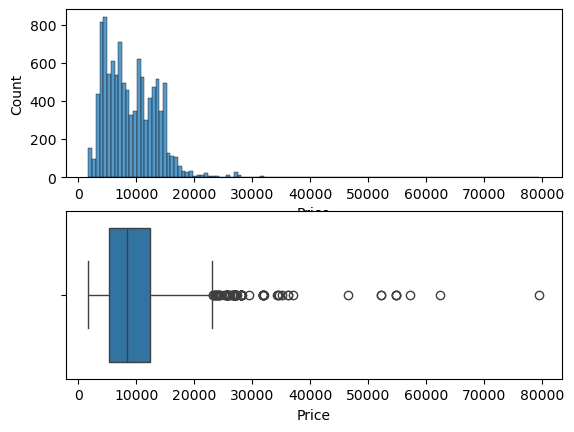

In [98]:
plotting(new_data,'Price')

In [99]:
new_data['Price']=np.where(new_data['Price']>=40000,new_data['Price'].median(),new_data['Price'])

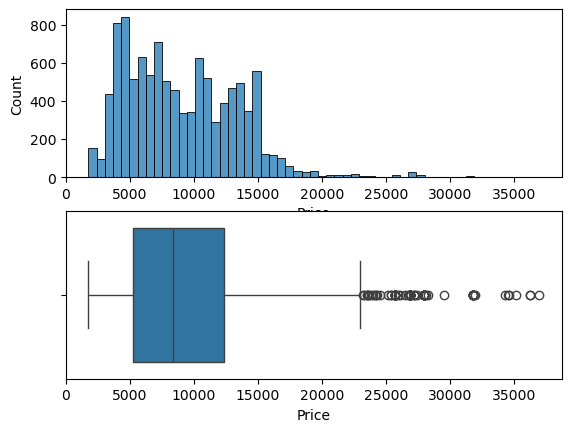

In [100]:
plotting(new_data,'Price')

In [101]:
y = new_data['Price']

In [102]:
X = new_data.drop('Price',axis=1)

In [103]:
X.head(3)

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,24,3,1,10,22,20,2,50
1,2,25,1,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,5,13,15,5,50,7,25
2,3,32,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,9,6,4,25,9,25,19,0


In [104]:
pd.DataFrame(y)

,Price
0,3897.0
1,7662.0
2,13882.0
3,6218.0
4,13302.0
...,...
10678,4107.0
10679,4145.0
10680,7229.0
10681,12648.0


In [105]:
X.shape

(10682, 34)

In [106]:
from sklearn.feature_selection import mutual_info_classif

In [107]:
imp_df = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp_df

,0
Route_1,2.332369
Route_2,3.022149
Route_3,2.558463
Route_4,1.736228
Route_5,1.467707
Chennai,0.169924
Delhi,1.359474
Kolkata,0.838144
Mumbai,0.257296
Air India,0.697609


In [108]:
imp_df.columns=['Importance']

In [109]:
imp_df.sort_values(by='Importance',ascending=False)

,Importance
Route_2,3.022149
Route_3,2.558463
Route_1,2.332369
Arr_Hr,1.940171
Total_Stops,1.910666
Duration_Hr,1.772160
Route_4,1.736228
Journey_Month,1.630058
Arr_Min,1.612297
Dep_Hr,1.507142


# APPLYING MACHINE LEARNING ALGOS AND AUTOMATE DATA

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [111]:
X_train

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
9322,2,5,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,6,19,50,17,15,2,35
2370,2,14,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9,6,9,45,20,25,13,20
5821,0,7,8,13,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,18,3,15,15,7,0,8,15
7774,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,5,1,30,18,35,6,55
8014,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,24,6,19,0,22,50,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3,6,19,0,2,15,16,45
8741,3,20,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,5,22,30,14,55,7,35
838,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,18,5,19,0,22,50,20,10
1967,2,14,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9,5,21,5,9,35,11,30


In [112]:
new_data

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Price,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897.0,24,3,1,10,22,20,2,50
1,2,25,1,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7662.0,1,5,13,15,5,50,7,25
2,3,32,4,5,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2,13882.0,9,6,4,25,9,25,19,0
3,2,34,3,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6218.0,12,5,23,30,18,5,5,25
4,0,34,8,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302.0,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,5,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4107.0,9,4,22,25,19,55,2,30
10679,2,5,29,13,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4145.0,27,4,23,20,20,45,2,35
10680,0,13,29,13,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,7229.0,27,4,11,20,8,20,3,0
10681,0,13,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,12648.0,1,3,14,10,11,30,2,40


In [113]:
X_test

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
6326,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,6,6,19,0,7,0,12,0
5354,1,19,29,13,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,9,5,4,20,2,55,1,25
4594,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6,4,19,55,16,55,3,0
9504,2,14,7,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,5,1,20,10,0,15,20
4282,2,7,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,8,15,6,30,25,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,9,3,18,50,21,50,21,0
8980,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,27,3,4,25,19,45,8,40
1884,0,13,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,24,4,22,15,19,30,2,45
7710,3,28,4,5,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,27,3,19,15,12,0,7,15


In [114]:
pd.DataFrame(y_train)

,Price
9322,4804.0
2370,14151.0
5821,12284.0
7774,7191.0
8014,10262.0
...,...
7155,14714.0
8741,6805.0
838,15554.0
1967,12384.0


In [115]:
from sklearn import metrics

In [116]:
import seaborn as sns

In [117]:
def algo(m1_model):
    model = m1_model.fit(X_train,y_train)
    print(f'''Training Score {model.score(X_train,y_train)}''')
    y_pred = model.predict(X_test)
    print(y_pred)
    r2 = metrics.r2_score(y_test,y_pred)
    print('r2-score: ',r2)
    print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
    print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
    sns.displot(y_test-y_pred)
    return y_pred

In [118]:
from sklearn.ensemble import RandomForestRegressor

Training Score 0.9549719455299839
[12232.435       5240.39166667  4804.78       ...  5645.91
 10719.335      12344.213     ]
r2-score:  0.7970748486741094
MSE:  3649398.374452932
MAE:  1149.6604803532011


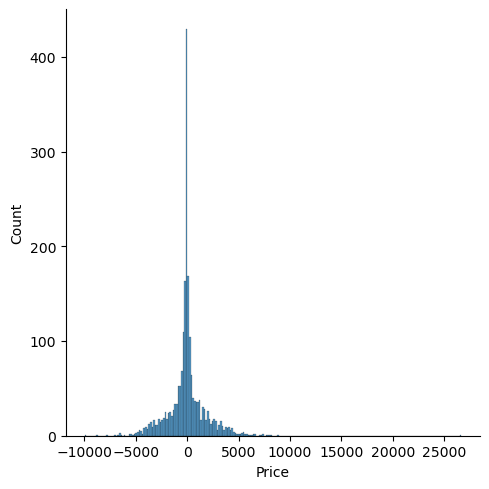

In [119]:
new_y = algo(RandomForestRegressor())

In [120]:
from sklearn.ensemble import RandomForestClassifier

Training Score 0.8869514335868929
[12192.  5678.  4823. ...  5613.  9653. 13376.]
r2-score:  0.6328651502982179
MSE:  6602539.482919982
MAE:  1433.0168460458588


array([12192.,  5678.,  4823., ...,  5613.,  9653., 13376.], shape=(2137,))

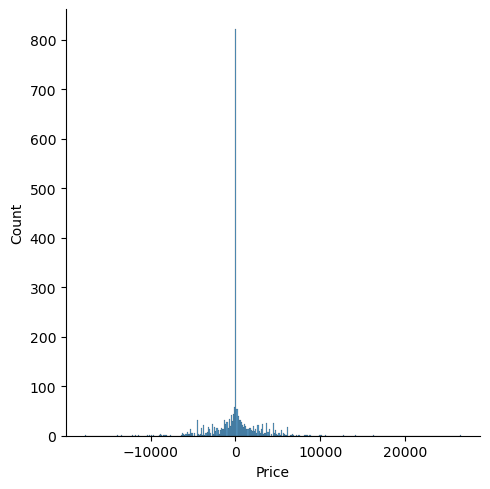

In [121]:
algo(RandomForestClassifier())

In [122]:
pd.DataFrame(new_y,columns=['price'])

,price
0,12232.435000
1,5240.391667
2,4804.780000
3,13131.452167
4,9920.667500
...,...
2132,14068.893333
2133,11175.666667
2134,5645.910000
2135,10719.335000


In [123]:
new_y = X_train.head(50)[::3]
new_y

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
9322,2,5,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,6,19,50,17,15,2,35
7774,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,5,1,30,18,35,6,55
2907,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,27,6,12,35,20,55,15,40
4064,2,14,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,5,19,25,7,35,11,50
8957,0,7,8,13,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,5,5,8,55,20,10
9128,2,7,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,12,6,10,5,16,30,17,35
4699,1,19,29,13,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3,6,0,15,22,45,1,30
9828,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,27,3,15,30,9,10,6,20
6242,4,8,29,13,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,6,0,25,22,5,2,20
2380,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,6,6,19,15,6,40,12,35


In [124]:
X_train

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
9322,2,5,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,6,19,50,17,15,2,35
2370,2,14,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9,6,9,45,20,25,13,20
5821,0,7,8,13,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,18,3,15,15,7,0,8,15
7774,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,5,1,30,18,35,6,55
8014,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,24,6,19,0,22,50,20,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,3,6,19,0,2,15,16,45
8741,3,20,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,9,5,22,30,14,55,7,35
838,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,18,5,19,0,22,50,20,10
1967,2,14,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9,5,21,5,9,35,11,30


In [125]:
model = RandomForestRegressor().fit(X_train,y_train)
price = model.predict(new_y)
price

array([ 4846.        ,  7406.48      , 10332.88      ,  5273.92      ,
       25519.75      ,  9323.38916667,  2013.85      ,  9542.31      ,
        5277.        ,  7505.1       ,  9936.24      ,  6944.789     ,
       23982.78      ,  8657.67      , 12018.27      ,  4820.02      ,
        6087.01404762])

In [126]:
X_test

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
6326,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,6,6,19,0,7,0,12,0
5354,1,19,29,13,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,9,5,4,20,2,55,1,25
4594,0,13,29,13,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6,4,19,55,16,55,3,0
9504,2,14,7,3,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,5,1,20,10,0,15,20
4282,2,7,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,8,15,6,30,25,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8974,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,9,3,18,50,21,50,21,0
8980,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,27,3,4,25,19,45,8,40
1884,0,13,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,24,4,22,15,19,30,2,45
7710,3,28,4,5,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,27,3,19,15,12,0,7,15


In [127]:
price

array([ 4846.        ,  7406.48      , 10332.88      ,  5273.92      ,
       25519.75      ,  9323.38916667,  2013.85      ,  9542.31      ,
        5277.        ,  7505.1       ,  9936.24      ,  6944.789     ,
       23982.78      ,  8657.67      , 12018.27      ,  4820.02      ,
        6087.01404762])

In [128]:
new_y['price'] = price

In [129]:
new_y

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min,price
9322,2,5,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,6,19,50,17,15,2,35,4846.000000
7774,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,5,1,30,18,35,6,55,7406.480000
2907,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,27,6,12,35,20,55,15,40,10332.880000
4064,2,14,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,5,19,25,7,35,11,50,5273.920000
8957,0,7,8,13,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,5,5,8,55,20,10,25519.750000
9128,2,7,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,12,6,10,5,16,30,17,35,9323.389167
4699,1,19,29,13,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3,6,0,15,22,45,1,30,2013.850000
9828,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,27,3,15,30,9,10,6,20,9542.310000
6242,4,8,29,13,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,6,0,25,22,5,2,20,5277.000000
2380,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,6,6,19,15,6,40,12,35,7505.100000


In [130]:
new_x = y_train.head(50)[::3]
new_x

9322     4804.0
7774     7191.0
2907    10262.0
4064     5320.0
8957    26890.0
9128     8529.0
4699     2017.0
9828    10141.0
6242     5277.0
2380     7354.0
336      9483.0
5689     7229.0
5986    28322.0
1000     9264.0
3232    13044.0
1165     5678.0
8131     4160.0
Name: Price, dtype: float64

In [131]:
new_x - price

9322     -42.000000
7774    -215.480000
2907     -70.880000
4064      46.080000
8957    1370.250000
9128    -794.389167
4699       3.150000
9828     598.690000
6242       0.000000
2380    -151.100000
336     -453.240000
5689     284.211000
5986    4339.220000
1000     606.330000
3232    1025.730000
1165     857.980000
8131   -1927.014048
Name: Price, dtype: float64

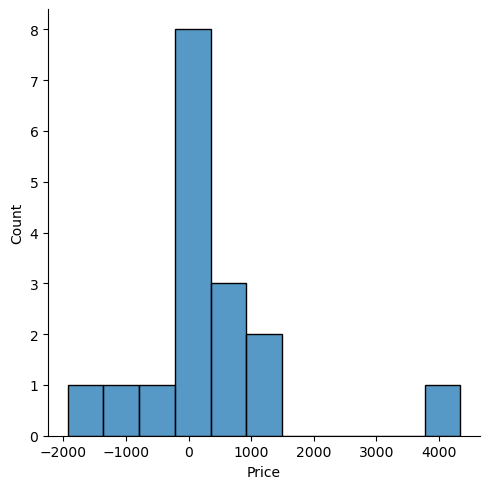

In [132]:
sns.displot(new_x-price)

In [133]:
new_y['old']=new_x

In [134]:
new_y['diff']=new_x-price

In [135]:
pd.options.display.max_rows=500

In [136]:
new_y

,Route_1,Route_2,Route_3,Route_4,Route_5,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_Date,Journey_Month,Arr_Hr,Arr_Min,Dep_Hr,Dep_Min,Duration_Hr,Duration_Min,price,old,diff
9322,2,5,29,13,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,6,19,50,17,15,2,35,4846.000000,4804.0,-42.000000
7774,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,5,1,30,18,35,6,55,7406.480000,7191.0,-215.480000
2907,3,7,6,13,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,27,6,12,35,20,55,15,40,10332.880000,10262.0,-70.880000
4064,2,14,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12,5,19,25,7,35,11,50,5273.920000,5320.0,46.080000
8957,0,7,8,13,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,5,5,8,55,20,10,25519.750000,26890.0,1370.250000
9128,2,7,3,13,5,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,12,6,10,5,16,30,17,35,9323.389167,8529.0,-794.389167
4699,1,19,29,13,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3,6,0,15,22,45,1,30,2013.850000,2017.0,3.150000
9828,3,7,6,13,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,27,3,15,30,9,10,6,20,9542.310000,10141.0,598.690000
6242,4,8,29,13,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12,6,0,25,22,5,2,20,5277.000000,5277.0,0.000000
2380,3,7,6,13,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,6,6,19,15,6,40,12,35,7505.100000,7354.0,-151.100000


In [137]:
print(new_y[['price', 'old', 'diff']].head(20))

             price      old         diff
9322   4846.000000   4804.0   -42.000000
7774   7406.480000   7191.0  -215.480000
2907  10332.880000  10262.0   -70.880000
4064   5273.920000   5320.0    46.080000
8957  25519.750000  26890.0  1370.250000
9128   9323.389167   8529.0  -794.389167
4699   2013.850000   2017.0     3.150000
9828   9542.310000  10141.0   598.690000
6242   5277.000000   5277.0     0.000000
2380   7505.100000   7354.0  -151.100000
336    9936.240000   9483.0  -453.240000
5689   6944.789000   7229.0   284.211000
5986  23982.780000  28322.0  4339.220000
1000   8657.670000   9264.0   606.330000
3232  12018.270000  13044.0  1025.730000
1165   4820.020000   5678.0   857.980000
8131   6087.014048   4160.0 -1927.014048
